<a href="https://colab.research.google.com/github/frank-morales2020/MLxDL/blob/main/PCA_COURSE2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


MAE Baseline Score: 8.232


MAE Score with Ratio Features: 7.948












              make   body_style  horsepower  curb_weight
118        porsche      hardtop         207         2756
117        porsche      hardtop         207         2756
119        porsche  convertible         207         2800
45          jaguar        sedan         262         3950
96          nissan    hatchback         200         3139
..             ...          ...         ...          ...
59   mercedes-benz        wagon         123         3750
61   mercedes-benz        sedan         123         3770
101         peugot        wagon          95         3430
105         peugot        wagon          95         3485
143         toyota        wagon          62         3110

[193 rows x 4 columns]




<Figure size 800x500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

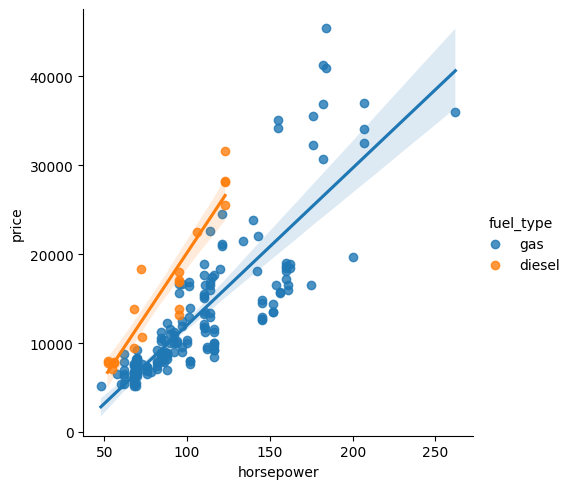

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 800x480 with 0 Axes>

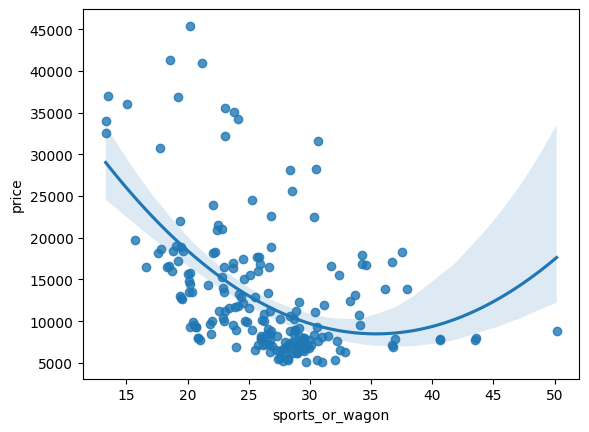

In [6]:

# https://www.kdnuggets.com/5-free-courses-to-master-machine-learning
# https://www.kaggle.com/learn/feature-engineering

#!pip install category_encoders
#!pip install colab-env --upgrade
import colab_env


import os
import warnings
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display
from pandas.api.types import CategoricalDtype

#!pip install category_encoders

from category_encoders import MEstimateEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import KFold, cross_val_score
from xgboost import XGBRegressor

#!kaggle kernels output ryanholbrook/what-is-feature-engineering -p /path/to/dest


import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

df = pd.read_csv("/content/gdrive/MyDrive/datasets/PCA/concrete.csv")
df.head()


X = df.copy()
y = X.pop("CompressiveStrength")


# Train and score baseline model
baseline = RandomForestRegressor(criterion="absolute_error", random_state=0)
baseline_score = cross_val_score(
    baseline, X, y, cv=5, scoring="neg_mean_absolute_error"
)
baseline_score = -1 * baseline_score.mean()

print()
print(f"MAE Baseline Score: {baseline_score:.4}")
print()
5
# Create synthetic features
X["FCRatio"] = X["FineAggregate"] / X["CoarseAggregate"]
X["AggCmtRatio"] = (X["CoarseAggregate"] + X["FineAggregate"]) / X["Cement"]
X["WtrCmtRatio"] = X["Water"] / X["Cement"]

# Train and score model on dataset with additional ratio features
model = RandomForestRegressor(criterion="absolute_error", random_state=0)
score = cross_val_score(
    model, X, y, cv=5, scoring="neg_mean_absolute_error"
)
score = -1 * score.mean()

print()
print(f"MAE Score with Ratio Features: {score:.4}")
print()


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

##plt.style.use("seaborn-whitegrid")

df = pd.read_csv("/content/gdrive/MyDrive/datasets/PCA/autos.csv")
df.head()

X = df.copy()
y = X.pop("price")

# Label encoding for categoricals
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X.dtypes == int

from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores[::3]


def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


                  ###### PLOT
print()
plt.figure(dpi=100, figsize=(8, 5))
print()
plot_mi_scores(mi_scores)
plt.savefig('ex0.pdf')
print()
plt.clf()


print()
plt.figure()
sns.relplot(x="curb_weight", y="price", data=df)
plt.savefig('ex1.pdf')
print()
plt.clf()

print()
plt.figure()
sns.lmplot(x="horsepower", y="price", hue="fuel_type", data=df)
plt.savefig('ex2.pdf')
print()
#plt.clf()


                ##### PCA #######


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display
from sklearn.feature_selection import mutual_info_regression



def plot_variance(pca, width=8, dpi=100):
    plt.figure()
    # Create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)

    print()
    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )
    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )
    # Set up figure
    fig.set(figwidth=8, dpi=100)
    return axs




def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores


#df = pd.read_csv("../input/fe-course-data/autos.csv")

df = pd.read_csv("/content/gdrive/MyDrive/datasets/PCA/autos.csv")
#df.head()


features = ["highway_mpg", "engine_size", "horsepower", "curb_weight"]
X = df.copy()
y = X.pop('price')
X = X.loc[:, features]


# Standardize
X_scaled = (X - X.mean(axis=0)) / X.std(axis=0)

from sklearn.decomposition import PCA


# Create principal components
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Convert to dataframe
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)

#X_pca.head()

loadings = pd.DataFrame(
    pca.components_.T,  # transpose the matrix of loadings
    columns=component_names,  # so the columns are the principal components
    index=X.columns,  # and the rows are the original features
)

#loadings

print()
plt.figure()
# Look at explained variance
plot_variance(pca)
plt.savefig('ex3.pdf')
print()
plt.clf()

mi_scores = make_mi_scores(X_pca, y, discrete_features=False)
#print(mi_scores)

print()
# Show dataframe sorted by PC3
idx = X_pca["PC3"].sort_values(ascending=False).index
cols = ["make", "body_style", "horsepower", "curb_weight"]
print(df.loc[idx, cols])

#import seaborn as sns

print()
df["sports_or_wagon"] = X.curb_weight / X.horsepower
plt.figure()
sns.regplot(x="sports_or_wagon", y='price', data=df, order=2)
plt.savefig('ex4.pdf')
print()
#plt.clf()
